**Hello World Example**

_This notebook is heavily based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow, 1st ed._
_You will need to install jupyter (otherwise you would not see this), matplotlib and scikit-learn for this notebook._ 

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [44]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
0
# To plot pretty figuresd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "sevens"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from https://www.openml.org

In [45]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,cache=True,return_X_y=False)

Find out the format the data.  

In [ ]:
print(type(mnist))
print(mnist)

<class 'sklearn.utils.Bunch'>
{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0 

Seems to be sklearns dictionary-like object with a data array and a target or label vector. Let's see the data's description.

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
print(type(mnist.data))
print(type(mnist.target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


These are numpy arrays. Let's ses their respective sizes.

In [55]:
# Use the notion of y=f(X)
X, y = mnist["data"], mnist["target"]

X = X.to_numpy()
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))

Data size: 70000 x 784 and label size 70000


In [53]:
X.shape

(70000, 784)

In [52]:

X_ = X.reshape(X.shape[0],28,28)
X_.shape

(70000, 28, 28)

In [ ]:

X







# X = X.values
X_ = X.copy()
# type(X)

print(X.shape[0])

X_ = X_.reshape(-1,28,28)
X_.shape



70000


(70000, 28, 28)

70,000 examples of images with 784 pixels. These are square:

In [ ]:
import math
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

The images are of size: 28.0 x 28.0


In [57]:
print(list(y))

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3', '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2', '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7', '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0', '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4', '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1', '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6', '7', '4', '6', '8', '0', '7', '8', '3', '1', '5', '7', '1', '7', '1', '1', '6', '3', '0', '2', '9', '3', '1', '1', '0', '4', '9', '2', '0', '0', '2', '0', '2', '7', '1', '8', '6', '4', '1', '6', '3', '4', '5', '9', '1', '3', '3', '8', '5', '4', '7', '7', '4', '2', '8', '5', '8', '6', '7', '3', '4', '6', '1', '9', '9', '6', '0', '3', '7', '2', '8', '2', '9', '4', '4', '6', '4', '9', '7', '0', '9', '2', '9', '5', '1', '5', '9', '1', '2', '3', '2', '3', '5', '9', '1', '7', '6', '2', '8', '2', '2', '5', '0', '7', '4', '9', '7', '8', '3', '2',

In [58]:
# convert the y values to integers from strings
y = y.astype(np.int32);

We can use the matplotlib library to plot the image as a grayscale image with pyplot. Let's find images labeled 7.   

In [60]:
#  print(list(y))
np.where(y==7)[0]

array([   15,    29,    38, ..., 69968, 69979, 69990])

There are 7293 images that are labeled 7
8084
(70000, 784)
(7293,)
Saving figure digit_7_plot


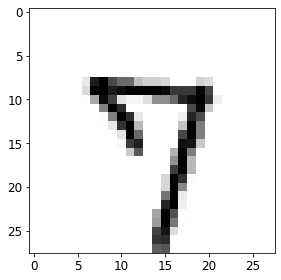

In [62]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index7 = np.where(y==7)[0]
print('There are {0} images that are labeled 7'.format(index7.shape[0]))

# randomly pick an image
pick = index7[np.random.choice(index7.shape[0])]
print(pick)
print(X.shape)
print(index7.shape)

# digit_7 = X.iloc[pick,:].values
digit_7 = X[pick,:]

# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)



plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")

# plt.axis("on")
# print to file
save_fig("digit_7_plot")
plt.show()

In [ ]:
digit_7.shape
# digit_7.reshape(28, 28)



(784,)

Function by Aurelien Geron to plot sample images in a matrix. Note that the indicies are hard-coded meaning that he is relying on the ordering of the dataset.

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)

    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1

    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))

    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:

index = np.where(y==1)[0]
# index
pick = index[np.random.choice(index.shape[0],10)]
pick

array([23703, 13297, 64232, 46181, 49441, 59954,  3509, 51067, 39555,
       57170])

In [65]:
index = np.where(y==5)[0]
index

array([    0,    11,    35, ..., 69982, 69988, 69998])

Saving figure more_digits_plot


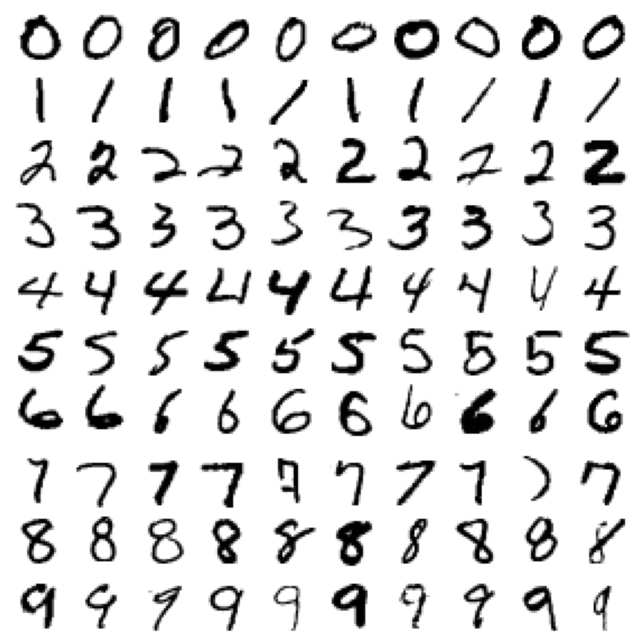

In [67]:
# randomly pick 10 images of each number
num_per_row = 10
examples = np.zeros((10*num_per_row,X.shape[1]))

for i in range(10):
    index = np.where(y==i)[0]
    # print('There are {0} images that are labeled {1}'.format(index.shape[0],i))
    pick = index[np.random.choice(index.shape[0],num_per_row)]
    examples[i*num_per_row:(i+1)*num_per_row,:] = X[pick,:]

    # examples[0:10,:] = X[pick,:]


    # examples[i*num_per_row:(i+1)*num_per_row,:] = X.iloc[pick,:].values

plt.figure(figsize=(9,9))
plot_digits(examples, images_per_row = num_per_row)
save_fig("more_digits_plot")
plt.show()

# Test and Training Data

Split data into test and training data after re-shuffling the data. We can simply take the first 60000 as training and the last 10000 as test. (Note the data seems to be already shuffled but let's make sure).

In [ ]:
np.random.permutation(5)


array([4, 3, 1, 0, 2])

In [68]:
shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]
# X_train, X_test, y_train, y_test = X.iloc[shuffle_index[:60000],:].values, X.iloc[shuffle_index[60000:],:].values, y[shuffle_index[:60000]], y[shuffle_index[60000:]]


# Binary classifier

Set up a binary classifier for 7 and not 7. We create new labels which are true meaning we have a 7 and false meaning we do not have a 7. 

In [ ]:
print(list(y_train == 7))

[False, False, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, F

In [70]:
print(list(y_train == 7))

[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, Fals

In [71]:
# print(list(y_train))

# np.where(y_train==7)

y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)
# print('We have a training set with {0} images of 7, and a test set with {1}'.format(sum(y_train_7),sum(y_test_7)))

# y_train_7

In [72]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

bin_clf = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
# sgd_clf = SGDClassifier(max_iter=5, random_state=42, )
bin_clf.fit(X_train, y_train_7)

LogisticRegression(max_iter=10, solver='liblinear', tol=0.1)

Let's pick a 7 out of the training set and see what our classifier predicts.

In [ ]:
digit_7.shape

(784,)

Classifier prediction is [ True] that the image is a 7


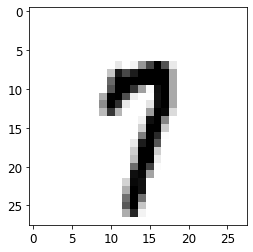

In [ ]:
index7 = np.where(y_train==7)[0]
# randomly pick an image again
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X_train[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
# plt.show()

print('Classifier prediction is {0} that the image is a 7'.format(bin_clf.predict([digit_7])))

Let's calculate accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bin_clf.predict(X_train)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train_7, y_pred)))


Classifier accuracy on the training set is 0.9834 


In [ ]:
X_train.shape, y_train_7.shape, y_pred.shape, sum(y_pred==y_train_7)/60000


((60000, 784), (60000,), (60000,), 0.9834666666666667)

In [73]:
from sklearn.base import BaseEstimator
class Never7Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Our data set is not balanced, i.e., we can create a simple classifier which never predicts a 7 and it wouldn't be so bad.

In [ ]:
never_7_clf = Never7Classifier()
y_pred_never = never_7_clf.predict(X_train)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train_7, y_pred_never)))

Classifier accuracy on the training set is 0.8958666666666667 


Let's calculate precision, recall and the f1 score; easy to crunch numbers ourselves but its built in.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print('Classifier scores on training set: ')
print('Precision is {0} '.format(precision_score(y_train_7, y_pred)))
print('Recall is {0} '.format(recall_score(y_train_7, y_pred)))
print('F1 is {0} '.format(f1_score(y_train_7, y_pred)))

print( 'And the confusion matrix: \n {0}'.format(confusion_matrix(y_train_7, y_pred) ))

Classifier scores on training set: 
Precision is 0.10847003682624708 
Recall is 0.10326693227091634 
F1 is 0.10580455547391623 
And the confusion matrix: 
 [[48399  5326]
 [ 5627   648]]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bin_clf, X_train, y_train_7, cv=5, scoring="accuracy")


This is how Aurelien Geron suggest we could implement cross-validation with stratified sampling ourselves. Note it produces the same as above.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5)

# We could random shuffle but than the reulst will not be exactly the same
# skfolds = StratifiedKFold(n_splits=5), shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_7):
    clone_clf = clone(bin_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_7[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_7[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9834166666666667
0.9816666666666667
0.9826666666666667
0.983
0.9839166666666667


Text(0, 0.5, 'Count')

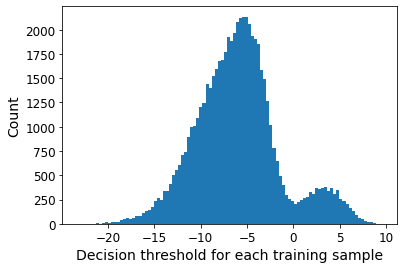

In [74]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(bin_clf, X_train, y_train_7, cv=5,
                             method="decision_function")
n, bins, patches = plt.hist(y_scores, 100)

plt.xlabel('Decision threshold for each training sample')
plt.ylabel('Count')


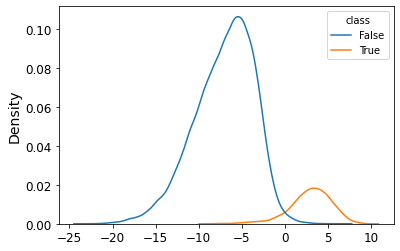

In [76]:
import seaborn as sns
sns.kdeplot(y_scores ,hue = y_train_7)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)


Saving figure precision_recall_vs_threshold_plot


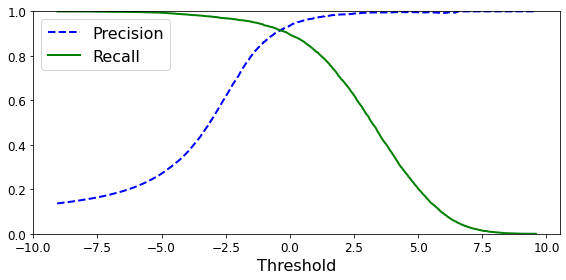

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure precision_vs_recall_plot


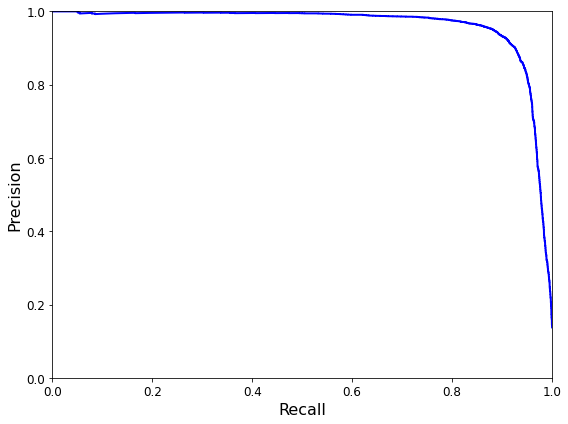

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

Saving figure roc_curve_plot


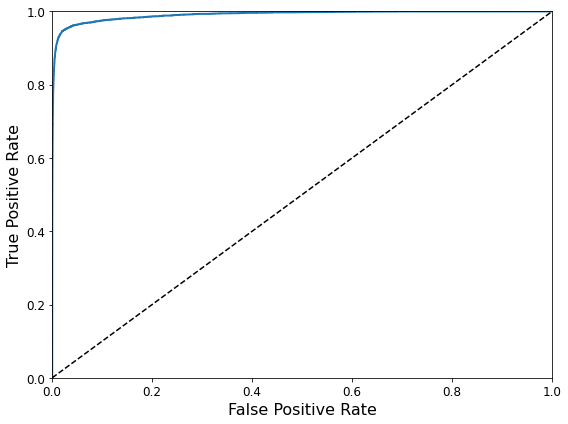

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

# Multiclass classification

Scikit-learn tutorial states: "The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties. E.g., with loss="log", SGDClassifier fits a logistic regression model, while with loss="hinge" it fits a linear support vector machine (SVM)."

In [ ]:
from sklearn.linear_model import SGDClassifier

# We could stop by setting the maximum iteration if this takes too long
sgd_clf = SGDClassifier(max_iter=10, random_state=42)
# sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=10, random_state=42)

In [ ]:
print('Classifier prediction is that the image belongs to class {0}'.format(sgd_clf.predict([digit_7])))

Classifier prediction is that the image belongs to class [7]


In [ ]:
# Warning: If you don't set maximum iterations, this will take a long time. 
# Setting maximum iteration to 10 will cause convergence warnings.
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=10, random_state=42))
ovo_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

OneVsOneClassifier(estimator=SGDClassifier(max_iter=10, random_state=42))

In [ ]:
print('Classifier prediction is that the image belongs to class {0}'.format(ovo_clf.predict([digit_7])))

Classifier prediction is that the image belongs to class [7]


In [ ]:
print('Number of classifiers needed for one-vs-one 10*9/2={0}'.format(len(ovo_clf.estimators_)))

Number of classifiers needed for one-vs-one 10*9/2=45


In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[5761    4   12   23   16   10   19    8   32    7]
 [   3 6595   29   30   10    9    8   23   39    5]
 [ 108  134 5036  164  135    8   59  131  148   29]
 [  81   53  138 5552   24   46   18   79  114   63]
 [  40   26   23   19 5466    6   22   64   77  152]
 [ 179   60   59  634  181 3509  120   67  449  116]
 [ 127   42   67   14   84   38 5429   11   65    4]
 [  43   39   56   27   69    4    4 5850   29  154]
 [ 119  358  112  367  108   88   42   97 4443  117]
 [  71   36    9  154  309   19    3  512  104 4744]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


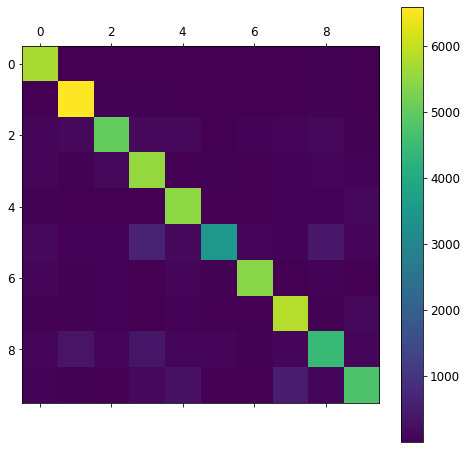

In [ ]:
# plt.matshow(conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(conf_mx)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Make errors more visible by printing the ratio and zeroing out the diagonal.

Saving figure confusion_matrix_errors_plot


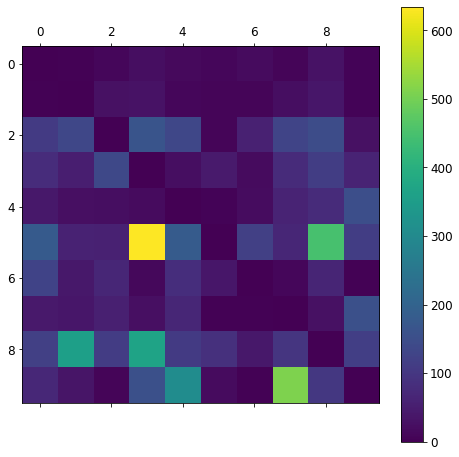

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(conf_mx)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# Confusion matrix samples
Print examples for the confusion between 8 and 5

Saving figure error_analysis_digits_plot


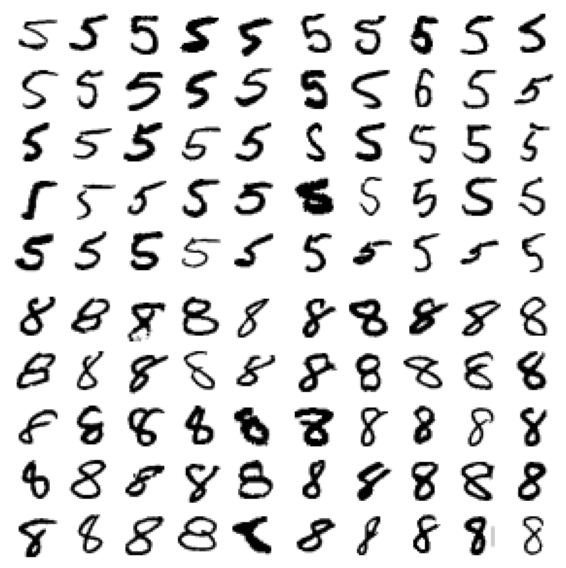

In [ ]:
cl_a, cl_b = 5, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()